# Unit 4 -  A Whale off the Port(folio)


## Table of Contents

* [1. Objective](#1)
* [2. Main Steps](#2)
* [3. Source Files](#3)
* [4. Data Cleaning](#4)
    * [4.1 Whale Returns](#4_1)
         * [4.1.1 Read Whale Returns Source Data](#4_1_1)
         * [4.1.2 Profile Whale Returns Source Data](#4_1_2)
         * [4.1.3 Cleanse Whale Returns Source Data](#4_1_3)
    * [4.2 Algorithmic Daily Returns](#4_2)    
         * [4.2.1 Read Algorithmic Daily Returns Source Data](#4_2_1)
         * [4.2.2 Profile Algorithmic Daily Returns Source Data](#4_2_2)
         * [4.2.3 Cleanse Algorithmic Daily Returns Source Data](#4_2_3)    
    * [4.3 S&P TSX 60 Returns](#4_2)    
         * [4.3.1 Read S&P TSX 60 Returns Source Data](#4_3_1)
         * [4.3.2 Profile S&P TSX 60 Returns Source Data](#4_3_2)
         * [4.3.3 S&P TSX 60 Returns Source Data](#4_3_3)        
     * [4.4 Combine Whale, Algorithmic, and S&P TSX 60 Returns](#4_4)    
* [5. Conduct Quantitative Analysis](#5)
    * [5.1 Performance Analysis](#5_1)
        * [5.1.1 Calculate and Plot the daily returns](#5_1_1)
        * [5.1.2 Calculate and Plot cumulative returns](#5_1_2)
    * [5.2 Risk Analysis](#5_2)    
        * [5.2.1 Create a box plot for each portfolio](#5_2_1)
        * [5.2.2 Calculate Standard Deviation](#5_2_2)
        * [5.2.3 Determine which portfolios are riskier than the S&P TSX 60](#5_2_3)
        * [5.2.4 Calculate the Annualized Standard Deviations](#5_2_4)
    * [5.3 Rolling Statistics](#5_3) 
        * [5.3.1 Calculate and plot rolling `std` for all portfolios with 21-day window](#5_3_1)
        * [5.3.2 Calculate and plot the correlation](#5_3_2)
        * [5.3.3 Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX](#5_3_3)
     * [5.4 Rolling Statistics Challenge: Exponentially Weighted Average](#5_4) 
* [6. Sharpe Ratios](#6)
    * [6.1 Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot](#6_1) 
    * [6.2 Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios](#6_2) 
* [7. Portfolio Creation](#7)
    * [7.1 Select 3-5 Stocks](#7_1)
    * [7.2 Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock](#7_2)
    * [7.3 Join your portfolio returns to the DataFrame that contains all of the portfolio returns](#7_3)   
    * [7.4 Re-run the risk analysis with your portfolio to see how it compares to the others](#7_4)       
        * [7.4.1 Calculate the Annualized Standard Deviation](#7_4_1) 
        * [7.4.2 Calculate and plot rolling `std` with a 21-day window](#7_4_2) 
        * [7.4.3 Calculate and plot the correlation](#7_4_3) 
        * [7.4.4 Calculate and plot the 60-day rolling beta for your portfolio compared to the S&P 60 TSX](#7_4_4) 
        * [7.4.5 Calculate the Sharpe ratios and generate a bar plot](#7_4_5)
        * [7.4.6 Portfolio Results](#7_4_6)

# 1. Objectives <a class="anchor" id="1"></a>
This notebook will analyze and visualize the major metrics of the portfolios, and determine which portfolio outperformed the others. Analysis will be conducted pn historical daily returns of several portfolios: some from the firm's algorithmic portfolios, some that represent the portfolios of famous "whale" investors like Warren Buffett, and some from the big hedge and mutual funds. The results of the analysis is to create a custom portfolio of stocks and compare its performance to that of the other portfolios, as well as the larger market (S&P TSX 60 Index).

# 2. Main Steps <a class="anchor" id="2"></a>
The three main steps that will be completed to achieve the above requirements are as follows:

* Read and prepare data
* Determine the success of each portfolio
* Choose and evaulate a custom portfolio


# 3. Source Files <a class="anchor" id="3"></a>
The source files that will inform our analysis are listed below:

* [algo_returns.csv](SourceData/algo_returns.csv)
* [otex_historical.csv](SourceData/otex_historical.csv)
* [sp_tsx_history.csv](SourceData/sp_tsx_history.csv)
* [l_historical.csv](SourceData/l_historical.csv)
* [shop_historical.csv](SourceData/shop_historical.csv)
* [whale_returns.csv](SourceData/whale_returns.csv)


In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sb

%matplotlib inline

# 4. Data Cleaning <a class="anchor" id="4"></a>

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## 4.1 Whale Returns <a class="anchor" id="4_1"></a>

Read the Whale Portfolio daily returns and clean the data.

#### 4.1.1 Read Whale Returns Source Data <a class="anchor" id="4_1_1"></a>

In [2]:
# Reading whale returns
csvpath = Path("SourceData\whale_returns.csv")
whale_returns_df = pd.read_csv(csvpath, index_col="Date",parse_dates=True,infer_datetime_format=True)

#Sort by Date
whale_returns_df = whale_returns_df.sort_index()

#Display Top 5 records
whale_returns_df.head(5)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


#### 4.1.2 Profile Whale Returns Source Data <a class="anchor" id="4_1_2"></a>

In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Duplicate check
whale_returns_df.duplicated()

Date
2015-03-02    False
2015-03-03    False
2015-03-04    False
2015-03-05    False
2015-03-06    False
              ...  
2019-04-25    False
2019-04-26    False
2019-04-29    False
2019-04-30    False
2019-05-01    False
Length: 1060, dtype: bool

#### 4.1.2 Cleanse Whale Returns Source Data <a class="anchor" id="4_1_3"></a>

In [5]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna().copy()

# Verify nulls dropped
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
# Rename columns
whale_returns_df = whale_returns_df.rename(columns={
    "SOROS FUND MANAGEMENT LLC": "Soros_Daily_Returns",
    "PAULSON & CO.INC. ": "Paulson_Daily_Returns",
    "TIGER GLOBAL MANAGEMENT LLC": "Tiger_Daily_Returns",
    "BERKSHIRE HATHAWAY INC": "BerkshireHathaway_Daily_Returns",
})
whale_returns_df.head(5)

,Soros_Daily_Returns,Paulson_Daily_Returns,Tiger_Daily_Returns,BerkshireHathaway_Daily_Returns
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## 4.2 Algorithmic Daily Returns <a class="anchor" id="4_2"></a>

Read the algorithmic daily returns and clean the data.

#### 4.2.1 Read Algorithmic Daily Returns Source Data <a class="anchor" id="4_2_1"></a>

In [7]:
# Reading algorithmic returns
csvpath = Path("SourceData/algo_returns.csv")
algo_returns_df = pd.read_csv(csvpath, index_col="Date",parse_dates=True,infer_datetime_format=True)

#Sort by Date
algo_returns_df = algo_returns_df.sort_index()

#Display Top 5 records
algo_returns_df.head(5)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


#### 4.2.2 Profile Algorithmic Daily Returns Source Data <a class="anchor" id="4_2_2"></a>

In [8]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Duplicate check
algo_returns_df.duplicated()

Date
2014-05-28    False
2014-05-29    False
2014-05-30    False
2014-06-02    False
2014-06-03    False
              ...  
2019-04-25    False
2019-04-26    False
2019-04-29    False
2019-04-30    False
2019-05-01    False
Length: 1241, dtype: bool

#### 4.2.3 Cleanse Algorithmic Daily Returns Source Data <a class="anchor" id="4_2_3"></a>

In [10]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()

# Verify nulls dropped
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
# Rename columns
algo_returns_df = algo_returns_df.rename(columns={
    "Algo 1": "Algo1_Daily_Returns",
    "Algo 2": "Algo2_Daily_Returns"
})
algo_returns_df.head(5)

,Algo1_Daily_Returns,Algo2_Daily_Returns
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## 4.3 S&P TSX 60 Returns <a class="anchor" id="4_3"></a>

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

#### 4.3.1 Read S&P TSX 60 Returns Source Data <a class="anchor" id="4_3_1"></a>

In [12]:
# Reading S&P TSX 60 Closing Prices
csvpath = Path("SourceData/sp_tsx_history.csv")

sp_tsx_history_df = pd.read_csv(csvpath, index_col="Date",parse_dates=True,infer_datetime_format=True)

#Sort by Date
sp_tsx_history_df = sp_tsx_history_df.sort_index()

#Display Top 5 records
sp_tsx_history_df.head(5)


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


#### 4.3.2 Profile S&P TSX 60 Returns Source Data <a class="anchor" id="4_3_2"></a>

In [13]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

#### 4.3.3 Cleanse S&P TSX 60 Returns Source Data <a class="anchor" id="4_3_3"></a>

In [14]:
# Fix Data Types
#Replace currency symbol with blank
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("[^0-9]","",regex=True)
sp_tsx_history_df["Close"]

Date
2012-10-01    1237019
2012-10-02    1239123
2012-10-03    1235947
2012-10-04    1244768
2012-10-05    1241899
               ...   
2019-12-20    1711844
2019-12-23    1712871
2019-12-24    1718015
2019-12-27    1716821
2019-12-30    1709856
Name: Close, Length: 1818, dtype: object

In [15]:
# Fix Data Types
# Change data type for column Close to that of float
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype("float")

In [16]:
#Confirm Data Types
sp_tsx_history_df["Close"].dtypes

dtype('float64')

In [17]:
# Drop nulls
sp_tsx_history_df = sp_tsx_history_df.dropna().copy()
# Verify nulls dropped
sp_tsx_history_df.isnull().sum()

Close    0
dtype: int64

In [18]:
# Calculate Daily Returns
sp_tsx_history_daily_return_df=sp_tsx_history_df.pct_change()
sp_tsx_history_daily_return_df=sp_tsx_history_daily_return_df.fillna(0)
sp_tsx_history_daily_return_df.head(5)


,Close
Date,
2012-10-01,0.000000
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_daily_return_df = sp_tsx_history_daily_return_df.rename(columns={
    "Close": "SP_TSX_Daily_Returns"
})
sp_tsx_history_daily_return_df.head(5)

,SP_TSX_Daily_Returns
Date,
2012-10-01,0.000000
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


## 4.4 Combine Whale, Algorithmic, and S&P TSX 60 Returns  <a class="anchor" id="4_4"></a>

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_daily_returns_df = pd.concat(
[whale_returns_df, algo_returns_df, sp_tsx_history_daily_return_df], axis="columns", join="inner"
)
combined_daily_returns_df.head(500)

,Soros_Daily_Returns,Paulson_Daily_Returns,Tiger_Daily_Returns,BerkshireHathaway_Daily_Returns,Algo1_Daily_Returns,Algo2_Daily_Returns,SP_TSX_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2017-03-03,0.001050,0.000191,0.002118,0.001445,-0.003131,0.000827,0.004625
2017-03-06,-0.003016,-0.010073,-0.004702,-0.006102,-0.001548,-0.005750,0.001361
2017-03-07,-0.005288,-0.007044,-0.004209,0.000338,-0.001838,-0.007664,-0.001342


---

# 5. Conduct Quantitative Analysis <a class="anchor" id="5"></a>

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## 5.1 Performance Analysis <a class="anchor" id="5_1"></a>

#### 5.1.1 Calculate and Plot the daily returns. <a class="anchor" id="5_1_1"></a>

<AxesSubplot:xlabel='Date'>

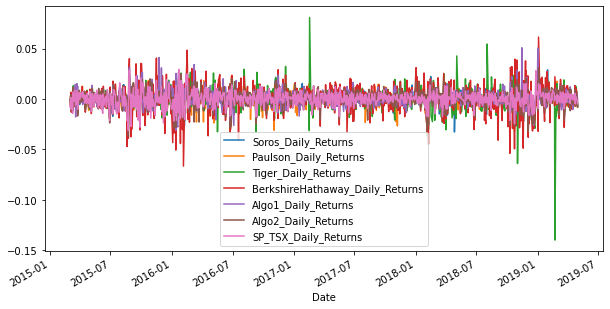

In [21]:
# Plot daily returns of all portfolios
combined_daily_returns_df.plot(figsize=(10,5))

#### 5.1.2 Calculate and Plot cumulative returns.  <a class="anchor" id="5_1_2"></a>

In [22]:
# Calculate cumulative returns of all portfolios
combined_cummulative_returns_df = (1 + combined_daily_returns_df).cumprod()-1
combined_cummulative_returns_df.head()

,Soros_Daily_Returns,Paulson_Daily_Returns,Tiger_Daily_Returns,BerkshireHathaway_Daily_Returns,Algo1_Daily_Returns,Algo2_Daily_Returns,SP_TSX_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


<AxesSubplot:xlabel='Date'>

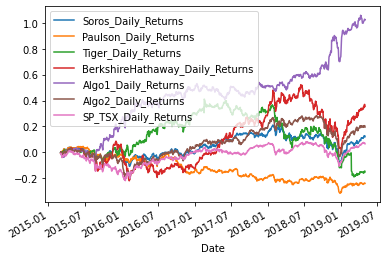

In [23]:
# Plot cumulative returns
combined_cummulative_returns_df.plot()

---

## 5.2 Risk Analysis <a class="anchor" id="5_2"></a>

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### 5.2.1 Create a box plot for each portfolio <a class="anchor" id="5_2_1"></a>


In [24]:
# Rename columns
combined_daily_returns_df = combined_daily_returns_df.rename(columns={
    "Soros_Daily_Returns":"Soros",
    "Paulson_Daily_Returns":"Paulson",
    "Tiger_Daily_Returns":"Tiger",
    "BerkshireHathaway_Daily_Returns":"Berkshire",
    "Algo1_Daily_Returns":"Algo1",
    "Algo2_Daily_Returns":"Algo2",
    "SP_TSX_Daily_Returns":"SP_TSX"
})

<AxesSubplot:title={'center':'Portfolio Daily Returns'}, xlabel='Portfolio', ylabel='Daily Returns'>

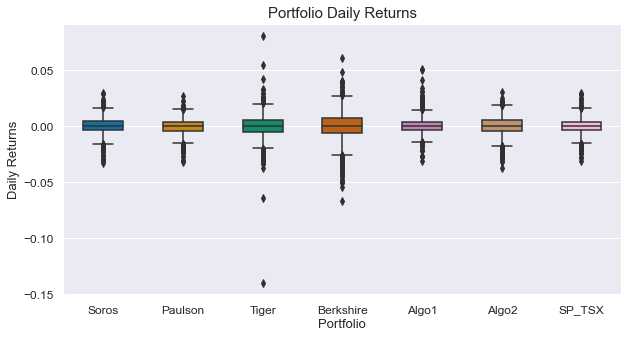

In [25]:
# Box plot to visually show risk
sb.set(rc={'figure.figsize':(10,5)})
bplot_daily_returns=sb.boxplot(data=combined_daily_returns_df,width=0.5,palette="colorblind")
bplot_daily_returns.axes.set_title("Portfolio Daily Returns",fontsize=15)
bplot_daily_returns.set_xlabel("Portfolio", fontsize=13)
bplot_daily_returns.set_ylabel("Daily Returns",fontsize=13)
bplot_daily_returns.tick_params(labelsize=12)
bplot_daily_returns

### 5.2.2 Calculate Standard Deviations <a class="anchor" id="5_2_2"></a>

In [26]:
# Calculate the daily standard deviations of all portfolios and rank in order of volatility.Least to most volatile. 
combined_daily_std_df = combined_daily_returns_df.std()
combined_daily_std_df = combined_daily_std_df.sort_values(ascending=True)
combined_daily_std_df

Paulson      0.006982
SP_TSX       0.007034
Algo1        0.007589
Soros        0.007828
Algo2        0.008326
Tiger        0.010883
Berkshire    0.012826
dtype: float64

<AxesSubplot:title={'center':'Standard Deviation'}>

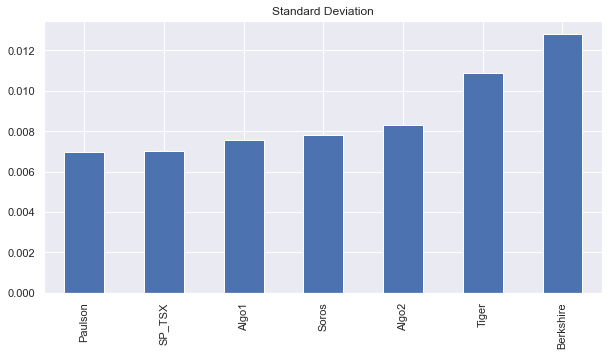

In [27]:
# Visualize the standard deviation as a bar plot
combined_daily_std_df.plot.bar(title="Standard Deviation")

### 5.2.3 Determine which portfolios are riskier than the S&P TSX 60 <a class="anchor" id="5_2_3"></a>

Based on the above the calculated standard deviation for the S&P TSX 60 is 0.064354. It has the least volatile returns compared to the other stocks in the portfolio.

### 5.2.4 Calculate the Annualized Standard Deviation <a class="anchor" id="5_2_4"></a>

In [28]:
# Calculate the annualized standard deviation (252 trading days)
combined_annualized_std_df = combined_daily_std_df * np.sqrt(252)
combined_annualized_std_df

Paulson      0.110841
SP_TSX       0.111664
Algo1        0.120470
Soros        0.124259
Algo2        0.132177
Tiger        0.172759
Berkshire    0.203599
dtype: float64

<AxesSubplot:title={'center':'Annualized Standard Deviation'}>

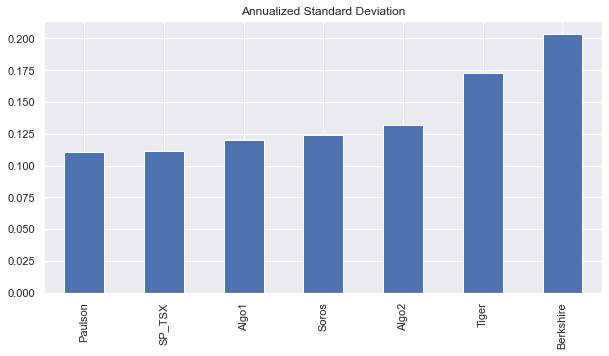

In [29]:
# Visualize the Annualized Standard Deviation as a bar plot
combined_annualized_std_df.plot.bar(title="Annualized Standard Deviation")

---

## 5.3 Rolling Statistics <a class="anchor" id="5_3"></a>

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### 5.3.1 Calculate and plot rolling `std` for all portfolios with 21-day window <a class="anchor" id="5_3_1"></a>

In [30]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_daily_returns_df.rolling(window=21).std()

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,SP_TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:xlabel='Date'>

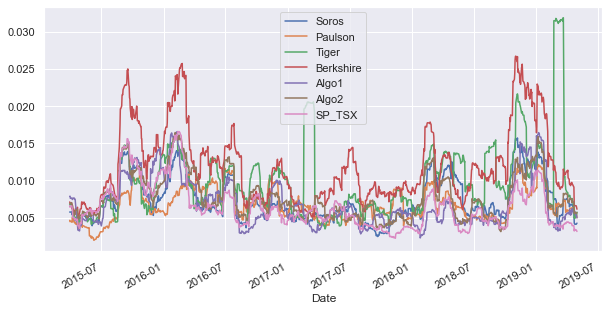

In [31]:
# Plot the rolling standard deviation
combined_daily_returns_df.rolling(window=21).std().plot()

### 5.3.2 Calculate and plot the correlation <a class="anchor" id="5_3_2"></a>

In [32]:
# Calculate the correlation
combined_correlation_df = combined_daily_returns_df.corr()
combined_correlation_df
# Display de correlation matrix

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,SP_TSX
Soros,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
Paulson,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
Tiger,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
Berkshire,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP_TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

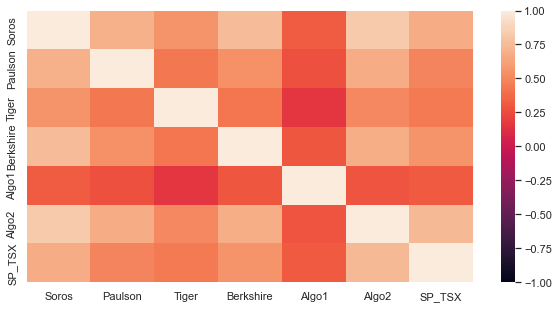

In [33]:
sb.heatmap(combined_correlation_df, vmin=-1, vmax=1)

### 5.3.3 Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX <a class="anchor" id="5_3_3"></a>

In [34]:
# Calculate covariance of a single portfolio
covariance_df = combined_daily_returns_df['Paulson'].cov(combined_daily_returns_df['SP_TSX'])
covariance_df

2.3894916563613417e-05

In [35]:
# Calculate variance of S&P TSX
variance_df = combined_daily_returns_df['SP_TSX'].var()
variance_df

4.947951591513103e-05

In [36]:
# Computing beta
Paulson_beta = covariance_df / variance_df
Paulson_beta

0.4829254312956255

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Paulson'}, xlabel='Date'>

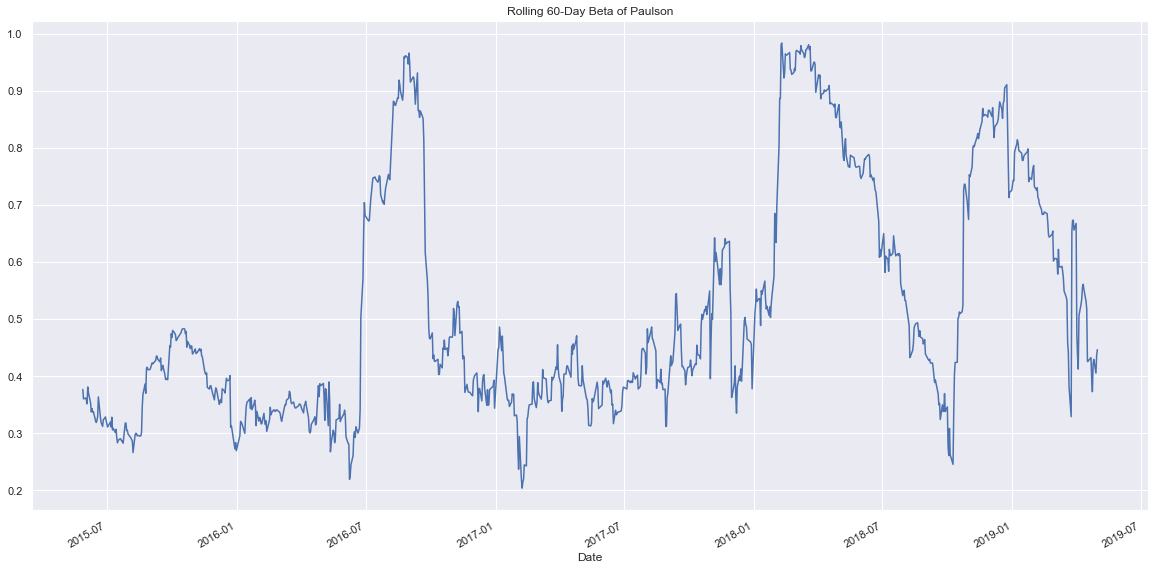

In [37]:
# Calculate 60-day rolling beta of Paulson and plot the data
rolling_variance_df = combined_daily_returns_df['SP_TSX'].rolling(window=60).var()
rolling_covariance_df = combined_daily_returns_df['Paulson'].rolling(window=60).cov(combined_daily_returns_df['SP_TSX'])
rolling_beta_df = rolling_covariance_df / rolling_variance_df
rolling_beta_df.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Paulson')

## 5.4 Rolling Statistics Challenge: Exponentially Weighted Average  <a class="anchor" id="5_4"></a>

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [38]:
# Use `ewm` to calculate the rolling window


---

# 6. Sharpe Ratios <a class="anchor" id="6"></a>
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

## 6.1 Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot <a class="anchor" id="6_1"></a>

In [39]:
# Annualized Sharpe Ratios
combined_sharpe_ratios_df = (combined_daily_returns_df.mean() * 252) / (combined_annualized_std_df)
combined_sharpe_ratios_df = combined_sharpe_ratios_df.sort_values(ascending=False)
combined_sharpe_ratios_df

Algo1        1.491514
Berkshire    0.467045
Algo2        0.396817
Soros        0.286709
SP_TSX       0.195550
Tiger       -0.144455
Paulson     -0.547594
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

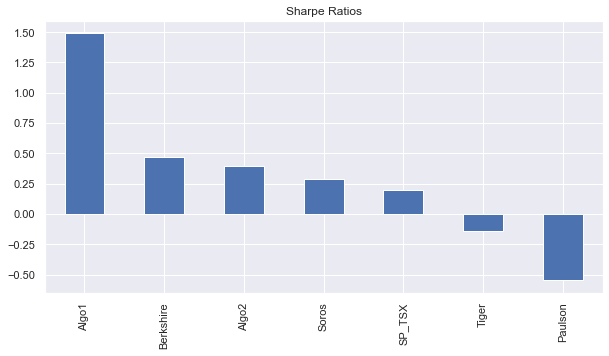

In [40]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios_df.plot.bar(title="Sharpe Ratios")


## 6.2 Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios. <a class="anchor" id="6_2"></a>

Write your answer here!

---

# 7. Create Custom Portfolio <a class="anchor" id="7"></a>

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## 7.1 Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock. <a class="anchor" id="7_1"></a>

In [41]:
# Reading data from 1st stock
amazon_sheet_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR0dmZA3fuayFdrNqjfwmfNs-ZpSfpFxsrQ8ZZOUZCJDfJJ_zsrcfBcUobC12RUxJlWRBpS5TU2NanJ/pub?gid=0&single=true&output=csv'
amazon_close_df=pd.read_csv(amazon_sheet_url, index_col="Date",parse_dates=True,infer_datetime_format=True)
amazon_close_df.index = amazon_close_df.index.strftime('%Y-%m-%d')
amazon_close_df = amazon_close_df.sort_index()
amazon_close_df = amazon_close_df.rename(columns={
    "Close": "Amazon_close"
})
amazon_close_df.head(5)

,Amazon_close
Date,
2019-01-02,1539.13
2019-01-03,1500.28
2019-01-04,1575.39
2019-01-07,1629.51
2019-01-08,1656.58


In [42]:
# Reading data from 2nd stock
moderna_sheet_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR0dmZA3fuayFdrNqjfwmfNs-ZpSfpFxsrQ8ZZOUZCJDfJJ_zsrcfBcUobC12RUxJlWRBpS5TU2NanJ/pub?gid=485576954&single=true&output=csv'
moderna_close_df=pd.read_csv(moderna_sheet_url, index_col="Date",parse_dates=True,infer_datetime_format=True)
moderna_close_df.index = moderna_close_df.index.strftime('%Y-%m-%d')
moderna_close_df = moderna_close_df.sort_index()
moderna_close_df = moderna_close_df.rename(columns={
    "Close": "Moderna_close"
})
moderna_close_df.head(5)

,Moderna_close
Date,
2019-01-02,15.33
2019-01-03,15.50
2019-01-04,16.96
2019-01-07,16.27
2019-01-08,16.95


In [43]:
# Reading data from 3rd stock
netflix_sheet_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR0dmZA3fuayFdrNqjfwmfNs-ZpSfpFxsrQ8ZZOUZCJDfJJ_zsrcfBcUobC12RUxJlWRBpS5TU2NanJ/pub?gid=111281906&single=true&output=csv'
netflix_close_df=pd.read_csv(netflix_sheet_url, index_col="Date",parse_dates=True,infer_datetime_format=True)
netflix_close_df.index = netflix_close_df.index.strftime('%Y-%m-%d')
netflix_close_df = netflix_close_df.sort_index()
netflix_close_df = netflix_close_df.rename(columns={
    "Close": "Netflix_close"
})
netflix_close_df.head(5)

,Netflix_close
Date,
2019-01-02,267.66
2019-01-03,271.20
2019-01-04,297.57
2019-01-07,315.34
2019-01-08,320.27


In [44]:
# Combine all stocks in a single DataFrame
custportfolio_combined_daily_close_df = pd.concat(
[amazon_close_df, moderna_close_df, netflix_close_df], axis="columns", join="inner"
)
custportfolio_combined_daily_close_df.head(5)

,Amazon_close,Moderna_close,Netflix_close
Date,,,
2019-01-02,1539.13,15.33,267.66
2019-01-03,1500.28,15.50,271.20
2019-01-04,1575.39,16.96,297.57
2019-01-07,1629.51,16.27,315.34
2019-01-08,1656.58,16.95,320.27


In [45]:
# Reorganize portfolio data by having a column per symbol


In [46]:
# Calculate daily returns
custportfolio_combined_daily_returns_df=custportfolio_combined_daily_close_df.pct_change()
custportfolio_combined_daily_returns_df = custportfolio_combined_daily_returns_df.rename(columns={
    "Amazon_close":"AMZN",
    "Moderna_close":"MRNA",
    "Netflix_close":"NFLX"
})

# Drop NAs
custportfolio_combined_daily_returns_df = custportfolio_combined_daily_returns_df.dropna().copy()

# Verify NAs dropped
custportfolio_combined_daily_returns_df.isnull().sum()

AMZN    0
MRNA    0
NFLX    0
dtype: int64

In [47]:
# Display sample data
custportfolio_combined_daily_returns_df.head(5)

,AMZN,MRNA,NFLX
Date,,,
2019-01-03,-0.025242,0.011089,0.013226
2019-01-04,0.050064,0.094194,0.097235
2019-01-07,0.034353,-0.040684,0.059717
2019-01-08,0.016612,0.041795,0.015634
2019-01-09,0.001714,-0.036578,-0.000968


## 7.2 Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock <a class="anchor" id="7_2"></a>

In [48]:
# Set weights
amazon_weight = 0.33
moderna_weight = 0.33
netflix_weight = 0.33

# Calculate portfolio return
custportfolio_weighted_returns_df = amazon_weight * custportfolio_combined_daily_returns_df["AMZN"] + moderna_weight * custportfolio_combined_daily_returns_df["MRNA"] + netflix_weight * custportfolio_combined_daily_returns_df["NFLX"] 
custportfolio_weighted_returns_df = custportfolio_weighted_returns_df.sort_values(ascending=True)
custportfolio_weighted_returns_df = pd.DataFrame(custportfolio_weighted_returns_df, columns=['PORTFOLIO'])
custportfolio_weighted_returns_df.head()

# Display sample data


,PORTFOLIO
Date,
2019-01-22,-0.048366
2019-05-07,-0.043206
2019-08-14,-0.038915
2019-06-03,-0.036477
2019-08-05,-0.034294


## 7.3 Join your portfolio returns to the DataFrame that contains all of the portfolio returns <a class="anchor" id="7_3"></a>

In [49]:
combined_daily_returns_df.index = combined_daily_returns_df.index.strftime('%Y-%m-%d')
combined_daily_returns_df = combined_daily_returns_df.sort_index()
custportfolio_combined_daily_returns_df = custportfolio_combined_daily_returns_df.sort_index()


In [50]:
# Join your returns DataFrame to the original returns DataFrame
# Combine all stocks in a single DataFrame
custportfolio_combined_returns_df = pd.concat(
[combined_daily_returns_df, custportfolio_combined_daily_returns_df,custportfolio_weighted_returns_df], axis="columns", join="inner"
)
custportfolio_combined_returns_df


,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,SP_TSX,AMZN,MRNA,NFLX,PORTFOLIO
Date,,,,,,,,,,,
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.009368,-0.025242,0.011089,0.013226,-0.000306
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.015048,0.050064,0.094194,0.097235,0.079692
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.005373,0.034353,-0.040684,0.059717,0.017618
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.006965,0.016612,0.041795,0.015634,0.024434
2019-01-09,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.013665,0.001714,-0.036578,-0.000968,-0.011824
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.000263,-0.000776,-0.015766,-0.005372
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.025433,0.020202,0.017702,0.020901
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,-0.006254,-0.042650,-0.008057,-0.018797


In [51]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

custportfolio_combined_returns_df = custportfolio_combined_returns_df.dropna().copy()
custportfolio_combined_returns_df.isnull().sum()

Soros        0
Paulson      0
Tiger        0
Berkshire    0
Algo1        0
Algo2        0
SP_TSX       0
AMZN         0
MRNA         0
NFLX         0
PORTFOLIO    0
dtype: int64

In [52]:
# Display Results
custportfolio_combined_returns_df

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,SP_TSX,AMZN,MRNA,NFLX,PORTFOLIO
Date,,,,,,,,,,,
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.009368,-0.025242,0.011089,0.013226,-0.000306
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.015048,0.050064,0.094194,0.097235,0.079692
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.005373,0.034353,-0.040684,0.059717,0.017618
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.006965,0.016612,0.041795,0.015634,0.024434
2019-01-09,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.013665,0.001714,-0.036578,-0.000968,-0.011824
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.000263,-0.000776,-0.015766,-0.005372
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.025433,0.020202,0.017702,0.020901
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,-0.006254,-0.042650,-0.008057,-0.018797


## 7.4 Re-run the risk analysis with your portfolio to see how it compares to the others <a class="anchor" id="7_4"></a>

### 7.4.1 Calculate the Annualized Standard Deviation <a class="anchor" id="7_4_1"></a>

In [53]:
# Calculate the daily standard deviations of all portfolios and rank in order of volatility.Least to most volatile. 
custportfolio_daily_std_df = custportfolio_combined_returns_df.std()
custportfolio_daily_std_df = custportfolio_daily_std_df.sort_values(ascending=True)
custportfolio_daily_std_df

SP_TSX       0.004543
Algo1        0.005556
Paulson      0.006778
Soros        0.007292
Algo2        0.007543
Berkshire    0.012546
AMZN         0.017067
Tiger        0.017678
PORTFOLIO    0.021239
NFLX         0.023837
MRNA         0.045472
dtype: float64

<AxesSubplot:title={'center':'Daily Standard Deviation'}>

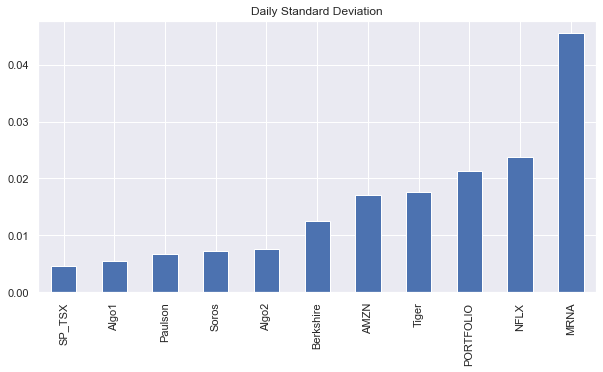

In [54]:
# Visualize the sharpe ratios as a bar plot
custportfolio_daily_std_df.plot.bar(title="Daily Standard Deviation")

In [55]:
# Calculate the annualized standard deviation (252 trading days)
custportfolio_annualized_std_df = custportfolio_daily_std_df * np.sqrt(252)
custportfolio_annualized_std_df

SP_TSX       0.072113
Algo1        0.088197
Paulson      0.107596
Soros        0.115762
Algo2        0.119742
Berkshire    0.199159
AMZN         0.270936
Tiger        0.280624
PORTFOLIO    0.337157
NFLX         0.378404
MRNA         0.721839
dtype: float64

<AxesSubplot:title={'center':'Annualised Standard Deviation'}>

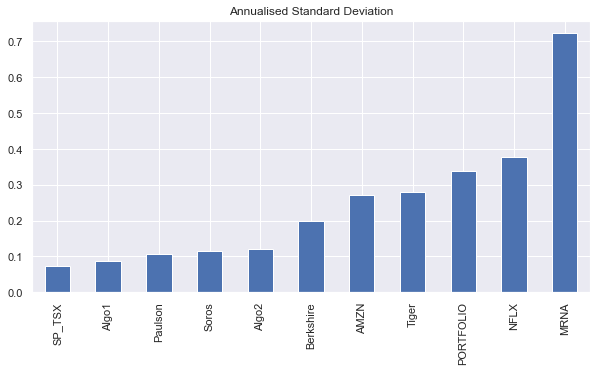

In [56]:
# Visualize the annualised Standard Deviation as a bar plot
custportfolio_annualized_std_df.plot.bar(title="Annualised Standard Deviation")

### 7.4.2 Calculate and plot rolling `std` with 21-day window <a class="anchor" id="7_4_2"></a>

In [57]:
# Calculate rolling standard deviation
custportfolio_rolling_std_df=custportfolio_combined_returns_df.rolling(window=21).std()
custportfolio_rolling_std_df.tail(5)

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,SP_TSX,AMZN,MRNA,NFLX,PORTFOLIO
Date,,,,,,,,,,,
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370,0.008214,0.051563,0.020046,0.019542
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321,0.008980,0.050520,0.019824,0.018867
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356,0.009299,0.052098,0.019969,0.019736
2019-04-30,0.004199,0.005408,0.005419,0.006323,0.005294,0.005600,0.003240,0.009574,0.052105,0.019996,0.019653
2019-05-01,0.004271,0.005009,0.005744,0.006143,0.004972,0.005686,0.003150,0.009245,0.052105,0.019583,0.019427


<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

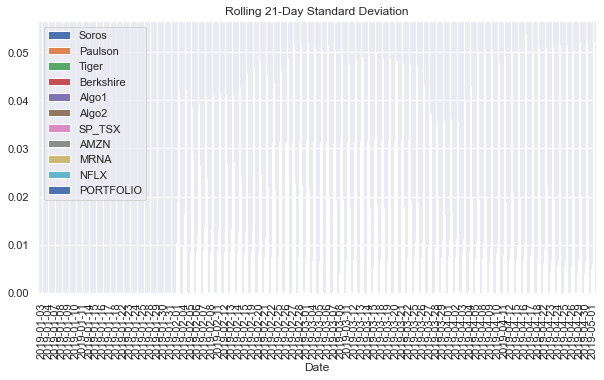

In [58]:
# Plot rolling standard deviation
custportfolio_rolling_std_df.plot.bar(title="Rolling 21-Day Standard Deviation")

### 7.4.3 Calculate and plot the correlation <a class="anchor" id="7_4_3"></a>

In [59]:
# Calculate and plot the correlation
custportfolio_correlation_df = custportfolio_combined_returns_df.corr()
custportfolio_correlation_df

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,SP_TSX,AMZN,MRNA,NFLX,PORTFOLIO
Soros,1.000000,0.751013,0.363262,0.742055,0.099731,0.807354,0.656081,0.584938,0.289910,0.449368,0.526376
Paulson,0.751013,1.000000,0.278640,0.618352,0.156997,0.731323,0.448598,0.518067,0.360116,0.415399,0.545664
Tiger,0.363262,0.278640,1.000000,0.144963,0.029891,0.207660,0.258661,0.216128,0.062653,0.104902,0.140432
Berkshire,0.742055,0.618352,0.144963,1.000000,0.174493,0.772924,0.662842,0.719391,0.180964,0.561220,0.526485
Algo1,0.099731,0.156997,0.029891,0.174493,1.000000,0.126729,0.103660,0.137123,0.079949,0.264269,0.190726
Algo2,0.807354,0.731323,0.207660,0.772924,0.126729,1.000000,0.707503,0.701730,0.276103,0.489400,0.562419
SP_TSX,0.656081,0.448598,0.258661,0.662842,0.103660,0.707503,1.000000,0.509003,0.194460,0.369688,0.409291
AMZN,0.584938,0.518067,0.216128,0.719391,0.137123,0.701730,0.509003,1.000000,0.195430,0.597521,0.624564
MRNA,0.289910,0.360116,0.062653,0.180964,0.079949,0.276103,0.194460,0.195430,1.000000,0.196299,0.831045
NFLX,0.449368,0.415399,0.104902,0.561220,0.264269,0.489400,0.369688,0.597521,0.196299,1.000000,0.667513


<AxesSubplot:>

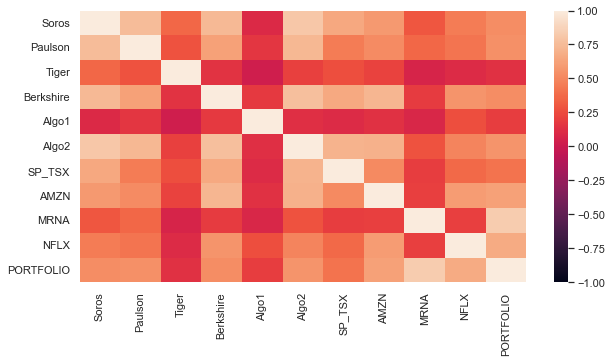

In [60]:
# Display de correlation matrix
sb.heatmap(custportfolio_correlation_df, vmin=-1, vmax=1)

### 7.4.4 Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX <a class="anchor" id="7_4_4"></a>

In [61]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
custportfolio_covariance_df = custportfolio_combined_returns_df['PORTFOLIO'].cov(custportfolio_combined_returns_df['SP_TSX'])
custportfolio_covariance_df

3.948930734019825e-05

In [62]:
# Calculate variance of S&P TSX
custportfolio_variance_df = custportfolio_combined_returns_df['SP_TSX'].var()
custportfolio_variance_df

2.063627134388946e-05

In [63]:
# Computing beta
custportfolio_beta = custportfolio_covariance_df / custportfolio_variance_df
custportfolio_beta

1.9135873279690763

### 7.4.5 Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot <a class="anchor" id="7_4_5"></a>

In [64]:
# Calculate Annualized Sharpe Ratios
custportfolio_sharpe_ratios_df = (custportfolio_combined_returns_df.mean() * 252) / (custportfolio_annualized_std_df)
custportfolio_sharpe_ratios_df = custportfolio_sharpe_ratios_df.sort_values(ascending=False)
custportfolio_sharpe_ratios_df

SP_TSX       5.865641
Soros        4.859864
Algo2        4.555069
Berkshire    4.262676
PORTFOLIO    3.691974
Algo1        3.582457
NFLX         3.010338
MRNA         2.673625
AMZN         2.594684
Paulson      2.479188
Tiger       -0.354035
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

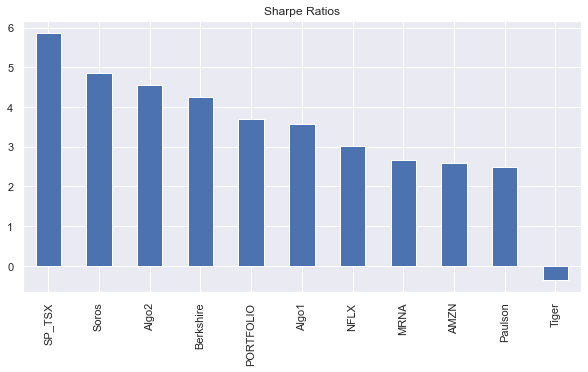

In [65]:
# Visualize the sharpe ratios as a bar plot
custportfolio_sharpe_ratios_df.plot.bar(title="Sharpe Ratios")

### 7.4.6 How does your portfolio do? <a class="anchor" id="7_4_6"></a>

Write your answer here!

Based on the results my PORTFOLIO tracls well against the market and is comparatively stable with regards to volitality and stability of returns.